# Ampliació informació APs i zones

En realitzar una primera aproximació sobre els APs i zones. Resulta que no tots els APs estan presents a la base de dades aquest script serveix per ampliar la informació a les dues bases de dades.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from pandas import DataFrame
import random

In [1]:
#Carga les dades per realitzar l'estudi
dataframe = pd.read_csv('observacionsEstiu20190724mod.csv',sep=';', error_bad_lines=False)
aps_informacio = pd.read_csv('distribucioaps.csv',sep=',')
arees = pd.read_csv('informacio_arees.csv', sep=',')

NameError: name 'pd' is not defined

La primera passa és obtenir aquells aps que no estan presents a la base de dades.

In [3]:
aps_no_incluits = dataframe.drop_duplicates(subset=['apmac'])
aps_no_incluits = aps_no_incluits['apmac']

aps_nous = list()

for i in aps_no_incluits:
    if i not in list(aps_informacio['mac']):
        aps_nous.append(i)
len(aps_nous)

84

In [4]:
len(aps_informacio)

114

S'observa que hi ha 84 APs que no tenen constància escrita, per aquesta raó la primera passa és ubicar-los en el mapa.
Per poder-los ubicar, es recolliran totes les entrades del AP i es farà una mitja entre la latitud i la longitud que com a resultat donarà la ubicació del AP.


In [5]:
dades_ubicacions = list()
for i in aps_nous:
    dades = dataframe[dataframe['apmac'] == i]
    latitud  = dades['lat']
    longitud = dades['lng']
    
    latiud_final = latitud.sum()/len(latitud)
    longitud_final = longitud.sum()/len(longitud)
    
    valors = (i, latiud_final, longitud_final)
    dades_ubicacions.append(valors)

In [6]:
dades_ubicacions_DF = DataFrame(dades_ubicacions)  

Una vegada ubicats es realitzarà un plot per observar les ubicacions dels nous APs al mapa actual dels APs.

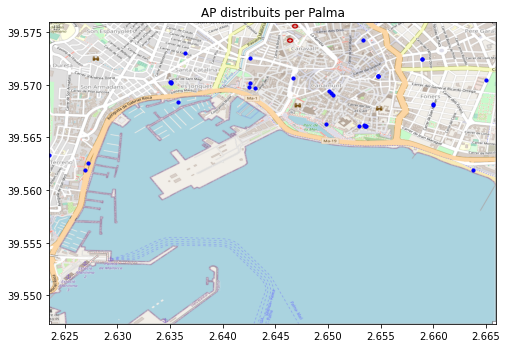

In [7]:
BBox = (2.6235454995185097, 2.66592666506767, 39.5472882813117, 39.5759175790653)

ruh_m = plt.imread('palma_de_mallorca.png')

fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(dades_ubicacions_DF[2], dades_ubicacions_DF[1], zorder=1, alpha= 1, c='b', s=10 )
ax.set_title('AP distribuits per Palma')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

S'observen nous punts per la zona de cobertura inicial, però falten punts per representar. La següent passa és indicar-li un nom i classificar-los en una zona.
Primer es mirarà si els APs estan a una zona existent i els hi donarà un nom acord a la ubicació. En altre cas, que segurament passarà, s'haurà d'utilitzar una eina com pot a ser google maps i escriure a mà el seu nom i la zona on pertany.
A mesura que es van cercant els APs no classificats es creïn noves zones o s'amplien les que ja estan fetes.

In [8]:
def obtencio_AP_arees(lat, lng, nombre): # Per APs que estan dins les àrees classificades.
    """
    A partir d'una mac detectar si està dins una area i posar-li un nóm
    """
    for index_fila, fila in arees.iterrows():
        if lat < fila['lat_max'] and lat > fila['lat_min'] and lng < fila['lng_max'] and lng > fila['lng_min']:
            string_name = "{}_{}".format(fila['zona_name'],nombre)
            valors = (string_name,fila['zona_name'])
            return valors
            break

In [9]:
#Tots els valors que no s'han pogut classificar.
valors_0=("Ajuntament de Palma 1","Plaça de Cort")
valors_1=("Escorxador_1", "Escorxador")
valors_2=("Escorxador_2", "Escorxador")
valors_3=("Plaça Santa Pagesa","Plaça Santa Pagesa")
valors_4=("Policia Llevant", "Parc Wifi Llevant")
valors_5=("Plaça Alexander Fleming","Plaça Alexander Fleming")
valors_6=("Plaça de Sant Eulàlia","Plaça de Sant Eulàlia")
valors_7=("biblioteca ramon Llull", "Plaça del Tubo")
valors_8=("Cala Major", "Cala Major")
valors_9=("Platja Ciutat Jardi", "Ciutat Jardi")
valors_10=("Parc de ses estacions 1", "Plaça d'Espanya")
valors_11=("Parc de ses estacions 2", "Plaça d'Espanya")
valors_12=("Estacio intermodal", "Plaça d'Espanya")
valors_13=("Passeig_born_13","Passeig del Born")
valors_14=("Tubo_2","Plaça del Tubo")
valors_15=("Escorxador_3", "Escorxador")
valors_16=("Centre Flassanders", "Plaça de Raimundo Clar")
valors_17=("Casal de Joves Migjorm","Carrer de Pere Ripoll i Palou")
valors_18=("Olehidraulica balear", "Carrer de Joan Alcover")
valors_19=("Plaça de l'Olivar","Plaça de l'Olivar")
valors_20=("Teatre Xesc Forteza 1", "Parc de la mar")
valors_21=("Carrer Pere d'Alcàntara Penya 1","Carrer Pere d'Alcàntara Penya")
valors_22=("Teatre Xesc Forteza 2", "Parc de la mar")
valors_23=("Botons concepto", "plaça de Raimundo Clar")
valors_24=("Psicoeducativos Asociación Arte Comics", "plaça de Raimundo Clar")
valors_25=("Biblioteca municipal Sant Jordi", "Sant Jordi")
valors_27=("CEIP Sa Indioteria","Sa Indioteria")
valors_28=("Antena de la cadena Ser", "Son Espanyol")
valors_29=("Parc de ses estacions 3", "Plaça d'Espanya")
valors_30=("Camp Redó 1", "Parc de Ca'n Simonet")
valors_31=("Centre Cultural Son Real", "carrer d'Arago")
valors_32=("USB Establiments", "Establiments")
valors_33=("Olehidraulica balear 2", "Carrer de Joan Alcover")
valors_34=("Museu krekovic 1","Parc Krekovic")
valors_35=("Carrer del Bastió d'en Berard","Parc de la mar")
valors_36=("Teatre Xesc Forteza 3", "Parc de la mar")
valors_37=("Carrer de Can Xado 1", "Molinar")
valors_38=("Son Ferriol", "Son Ferriol")
valors_39=("Camp Redó 2", "Parc de Ca'n Simonet")
valors_40=("Ambulatori Arenal", "Arenal")
valors_41=("Ajuntament de Palma 2","Plaça de Cort")
valors_42=("Biblioteca Son Cladera 1", "Son Cladera")
valors_43=("Teatre Mar i Terra 1", "Passeig maritim")
valors_44=("Biblioteca son Ximelis 1","Son Ximelis")
valors_45=("Biblioteca Son Cladera 2", "Son Cladera")
valors_46=("Museu krekovic 2","Parc Krekovic")
valors_47=("Parc El Secar de la Real 1", "Secar de la Real")
valors_48=("Biblioteca de Son Sardina 1", "Son Sardina")
valors_49=("Rafal Vell 1", "Rafal Vell")
valors_50=("Camp de Son Malferit", "Son Malferit")
valors_53=("Parc de ses estacions 4", "Plaça d'Espanya")
valors_55=("Parc de ses estacions 5", "Plaça d'Espanya")
valors_56=("Teatre Mar i Terra 2", "Passeig maritim")
valors_57=("Passeig Dalt Murada","Parc de la mar")
valors_58=("Carrer de la Midonera","Llotja de Palma")
valors_59=("Camp Redó 3", "Parc de Ca'n Simonet")
valors_60=("Biblioteca de Son Sardina 1", "Son Sardina")
valors_61=("Camp Redó 4", "Parc de Ca'n Simonet")
valors_62=("Biblioteca Son Gotleu","Son Gotleu")
valors_63=("Biblioteca El Terreno","Passeig maritim")
valors_64=("Biblioteca son Ximelis 2","Son Ximelis")
valors_65=("Biblioteca Coll D'En Rebassa", "Coll d'En Rebassa")
valors_66=("Carrer Pere d'Alcàntara Penya 2","Carrer Pere d'Alcàntara Penya")
valors_67=("Parc El Secar de la Real 2", "Secar de la Real")
valors_68=("Miguez Garrido Jose","Llotja de Palma")
valors_70=("Casal de Barri Can Alonso", "Plaça de Toros")
valors_71=("Biblioteca Sant Jordi", "Sant Jordi")
valors_72=("Biblioteca Municipal Génova","Génova")
valors_73=("Biblioteca son Ximelis 3","Son Ximelis")
valors_74=("Teatre Mar i Terra 3", "Passeig maritim")
valors_75=("Teatre Xesc Forteza 3", "Parc de la mar")
valors_76=("Biblioteca Son Fortesa", "Can Capes")
valors_77=("Biblioteca Son Rapinya","Son Rapinya")
valors_78=("Casal de Barri S'Hostalot", "S'Hostalot")
valors_79=("PLaça de Josep Gusap", "L'Aranjassa")
valors_80=("Carrer del Forn de l'Olivera 1","Llotja de Palma")
valors_81=("Parc Ciutat Jardi", "Ciutat Jardi")
valors_82=("Carrer de la Fàbrica","Santa Catalina")
valors_83=("Cami del Destre", "Sa Garriga") #Està perdut, no té sentit.

In [10]:
#Algortime per posar noms i zones als APs
dades_ubicacions_DF['nom'] = "none"
dades_ubicacions_DF['zona'] = "none"
for index_fila, fila in dades_ubicacions_DF.iterrows():
    dades_fila = obtencio_AP_arees(fila[1], fila[2], index_fila) #Si està en una zona és classifica
    if dades_fila == None:
        nom = "valors_{}".format(index_fila) # Per altre banda és posa la dupla ja creada.
        dades_fila = vars()[nom]
    dades_ubicacions_DF['nom'].iloc[index_fila] = dades_fila[0]
    dades_ubicacions_DF['zona'].iloc[index_fila] = dades_fila[1]
    
    

/home/pau/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
dades_ubicacions_DF.head()

,0,1,2,nom,zona
0,00:18:0a:5b:36:20,39.569392,2.650107,Ajuntament de Palma 1,Plaça de Cort
1,00:18:0a:5b:4b:a0,39.584526,2.649317,Escorxador_1,Escorxador
2,00:18:0a:5b:53:a0,39.584630,2.649210,Escorxador_2,Escorxador
3,00:18:0a:5b:5d:b0,39.582235,2.648935,Plaça Santa Pagesa,Plaça Santa Pagesa
4,00:18:0a:5b:62:10,39.570455,2.664996,Policia Llevant,Parc Wifi Llevant


Per últim faltaria un indicador numèric per les zones.

In [13]:
arees_noms = list(arees['zona_name'])
ultim_identificador = 12 #Comença a partir del 12 l'identificador.
for index_fila, fila in dades_ubicacions_DF.iterrows():
    if fila['zona'] not in arees_noms:
        identificador_zona = "SmartWiFiPalma Zona {}".format(ultim_identificador)
        df2 = pd.DataFrame([[fila['zona'],identificador_zona]], columns = ("zona_name","zona"))
        arees = arees.append(df2)
        arees_noms.append(fila['zona'])
        ultim_identificador = ultim_identificador + 1

Una vegada completat la taula d'APs faltaria completar la informació sobre la taula de les zones. Que només faltaria escriure la seva àrea.
On es recolliran els màxims i mínims de les longituds i les latituds dels punts.

In [14]:
arees = arees.reset_index(drop=True) #Se reinicia l'índex de la taula

In [15]:
valors = (arees['zona_name'], arees['zona']) #És realitza un merge de les dades per poder-los classsificar més encdavant
arees_sub = list(valors)
arees_sub = DataFrame(valors)
arees_sub = arees_sub.T #Es tranposa la taula per el format de dues columnes.

dades_ubicacions_DF = dades_ubicacions_DF.merge(arees_sub, left_on='zona', right_on='zona_name')

dades_ubicacions_DF = dades_ubicacions_DF.drop(['zona_x'], axis=1)

dades_ubicacions_DF.columns= ['mac', 'lat', 'lng', 'name', 'zona_name', 'zona'] #Es crea el dataframe 


In [16]:
#s'elimina aquesta columna a causa de que es va crear per realitzar probes
aps_informacio = aps_informacio.drop(['zona_abreviat'], axis=1)


aps_ampliat = pd.concat([aps_informacio, dades_ubicacions_DF])
aps_ampliat = aps_ampliat.reset_index(drop=True)

In [17]:
aps_ampliat

,mac,name,lat,lng,zona,zona_name
0,00:18:0a:04:78:72,Mar de Nudos - Gat. Terraza,39.566754,2.644041,SmartWiFiPalma Zona 0,Moll Vell
1,00:18:0a:04:a1:ca,Mar de Nudos - Gat. Mar de Nudos,39.566653,2.643939,SmartWiFiPalma Zona 0,Moll Vell
2,00:18:0a:03:12:1a,Gat. Moll Vell - Amarres,39.566083,2.643238,SmartWiFiPalma Zona 0,Moll Vell
3,88:15:44:2c:34:60,Gat. Moll Vell - Restaurante Port Blanc,39.566233,2.643587,SmartWiFiPalma Zona 0,Moll Vell
4,88:15:44:59:3e:d0,Gat. Varadero Parada Autobuses,39.565102,2.643442,SmartWiFiPalma Zona 0,Moll Vell
...,...,...,...,...,...,...
193,e0:55:3d:1b:f1:b0,Biblioteca Son Rapinya,39.589577,2.616066,SmartWiFiPalma Zona 48,Son Rapinya
194,00:18:0a:af:ae:a0,Casal de Barri S'Hostalot,39.588024,2.729985,SmartWiFiPalma Zona 49,S'Hostalot
195,e0:55:3d:1b:6d:20,PLaça de Josep Gusap,39.541454,2.776049,SmartWiFiPalma Zona 50,L'Aranjassa
196,e0:55:3d:1b:7c:80,Carrer de la Fàbrica,39.572994,2.636457,SmartWiFiPalma Zona 51,Santa Catalina


In [18]:
for index_fila, fila in arees.iterrows(): #S'obtenent les longituds màximes i mínimes i s'inclouen
    aps_zona = aps_ampliat[aps_ampliat['zona_name'] == fila['zona_name']]
    arees['lng_min'].iloc[index_fila] = aps_zona.lng.min()
    arees['lng_max'].iloc[index_fila] = aps_zona.lng.max()
    arees['lat_min'].iloc[index_fila] = aps_zona.lat.min()
    arees['lat_max'].iloc[index_fila] = aps_zona.lat.max()
    

/home/pau/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Una vegada ja completat les dues taules, és representarà tot els punts en el mapa.

In [19]:
BBox = ((aps_ampliat.lng.min(),aps_ampliat.lng.max(), aps_ampliat.lat.min(), aps_ampliat.lat.max()))
BBox

(2.5996081829071005, 2.780427256091712, 39.50920867919921, 39.6352310180664)

In [20]:
ruh_m = plt.imread('palma_de_mallorca_2.png')

In [21]:
def random_color(): #És pintarà cada zona de color diferent 
    number_of_colors = 8

    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])]
    return color[0]
random_color()

'#45DA65'

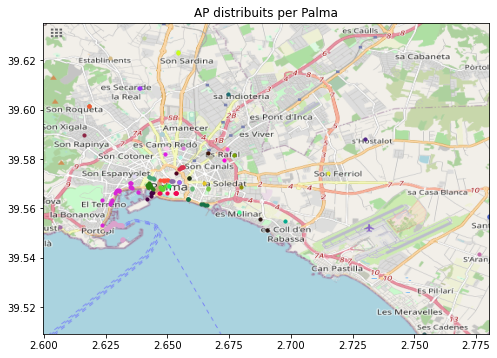

In [22]:
fig, ax = plt.subplots(figsize = (8,7))
for index_fila, fila in arees.iterrows():
    aps_zona = aps_ampliat[aps_ampliat['zona_name'] == fila['zona_name']]
    ax.scatter(aps_zona.lng, aps_zona.lat, zorder=1, alpha= 1, c=random_color(), s=10 )
ax.set_title('AP distribuits per Palma')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [23]:
#Per compilar les dades en csvs.

compression_opts = dict(method='zip',         #Métode per crear un csv.

                        archive_name='distribucioapsampliat.csv') 
aps_ampliat.to_csv('distribucioapsampliat.zip', index=False,
                       compression=compression_opts) 

compression_opts = dict(method='zip',         #Métode per crear un csv.

                        archive_name='zonesapsampliat.csv') 
arees.to_csv('zonesapsampliat.zip', index=False,
                       compression=compression_opts) 
